# Experiments Report
张杨 23210980125

项目代码和模型训练日志、权重文件见仓库：<https://github.com/AIboy996/npnn>

## 实验基本情况

- 数据集：[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)，数据集包含十个类别的服装图像
    - 数据集划分：48,000张图像作为训练集，12,000张图像作为验证集，10,000张图像作为测试集。
- 模型：`./model.py`中实现的FNN模型，中间层为可变数量的线性层+ReLU，输出层是LogSoftmax。
- 训练：
    - 损失函数：使用负对数似然损失函数（在LogSoftmax输出下这等价于[CrossEntyropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)）。
    - 优化器：使用Adam梯度下降
- 超参数搜索：进行了两次超参数搜索，搜索的结果保存在`search_result1.csv`和`search_result2.csv`
    - 第一次主要搜索双隐藏层的模型，第二次只搜索单隐藏层的模型
    - 由于计算速度比较慢，第一次搜索每个模型只训练一个epoch，第二次训练所有模型都训练三个epoch
    - 双隐藏层最好的四个模型：
        no|train_id|accuracy|hidden_size|batch_size|learning_rate|regularization|regular_strength
        --|--|--|--|--|--|--|--
        45|2024_0423(1713807562)|0.8125|[256, 64]|8|0.004|l2|0.1
        46|2024_0423(1713808209)|0.812|[256, 64]|8|0.004|l2|0.01
        44|2024_0423(1713806930)|0.8117|[256, 64]|8|0.004|None|0
        65|2024_0423(1713816056)|0.8091|[128, 64]|8|0.004|l2|0.1
    - 单隐藏层最好的四个模型：
        no|train_id|accuracy|hidden_size|batch_size|learning_rate|regularization|regular_strength
        --|--|--|--|--|--|--|--
        4|2024_0423(1713857657)|0.8373|[384]|3|0.002|l2|0.001
        109|2024_0426(1714116650)|0.8365|[128]|16|0.004|l2|0.001
        57|2024_0425(1713993322)|0.8314|[256]|8|0.004|l2|0.01
        0|2024_0423(1713841292)|0.8306|[384]|3|0.002|None|0

In [1]:
from matplotlib import colormaps
import matplotlib.pyplot as plt
from viz import viz_trainlog, viz_model, viz_search

## 参数搜索可视化
不难发现，模型的准确度和学习率大致呈现负相关。正则化强度则没有固定的模式。

(<Figure size 1500x1000 with 30 Axes>, <Figure size 1500x1000 with 24 Axes>)

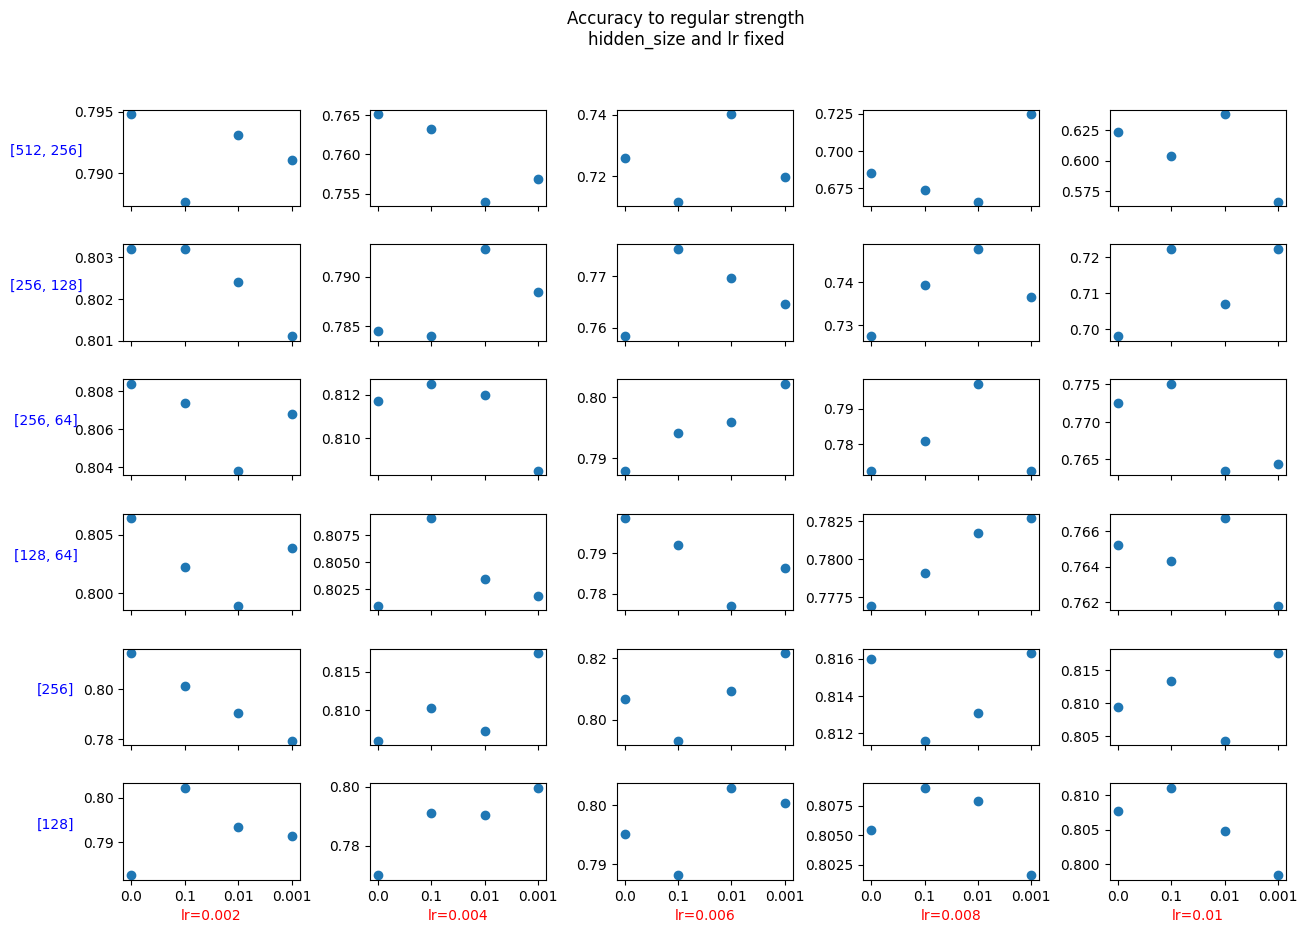

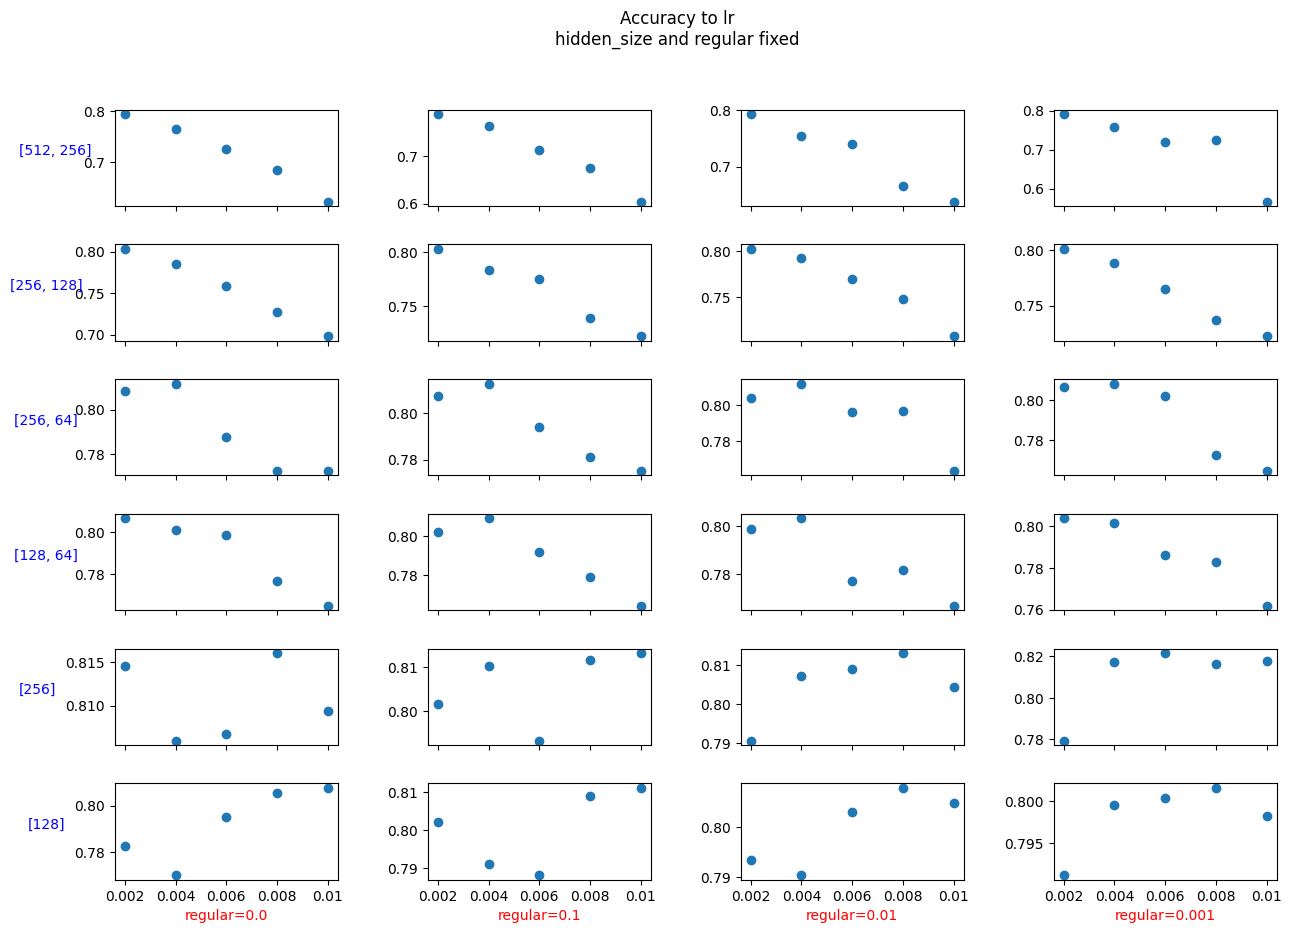

In [2]:
viz_search('search_result1.csv', [(15, 10), (15, 10)])

(<Figure size 3500x1000 with 30 Axes>, <Figure size 3500x1000 with 15 Axes>)

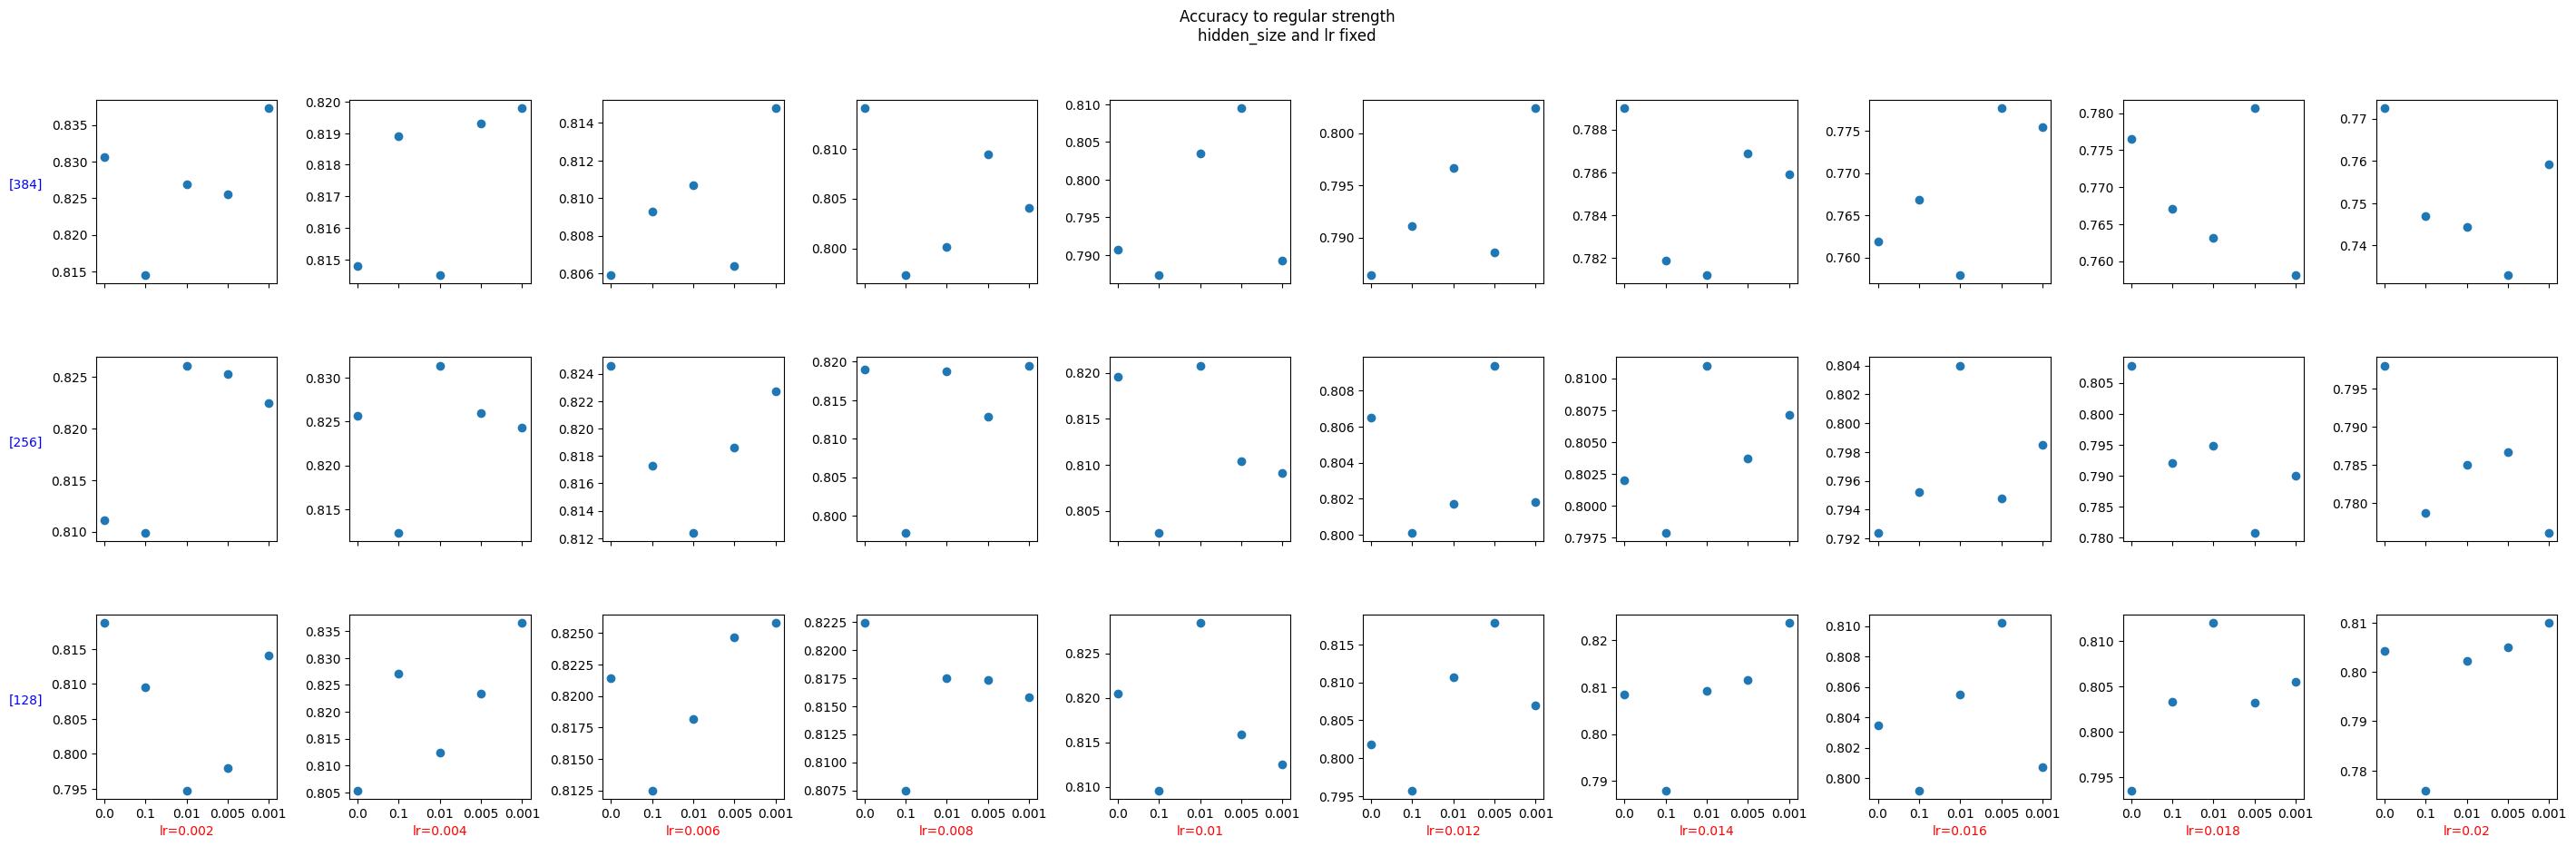

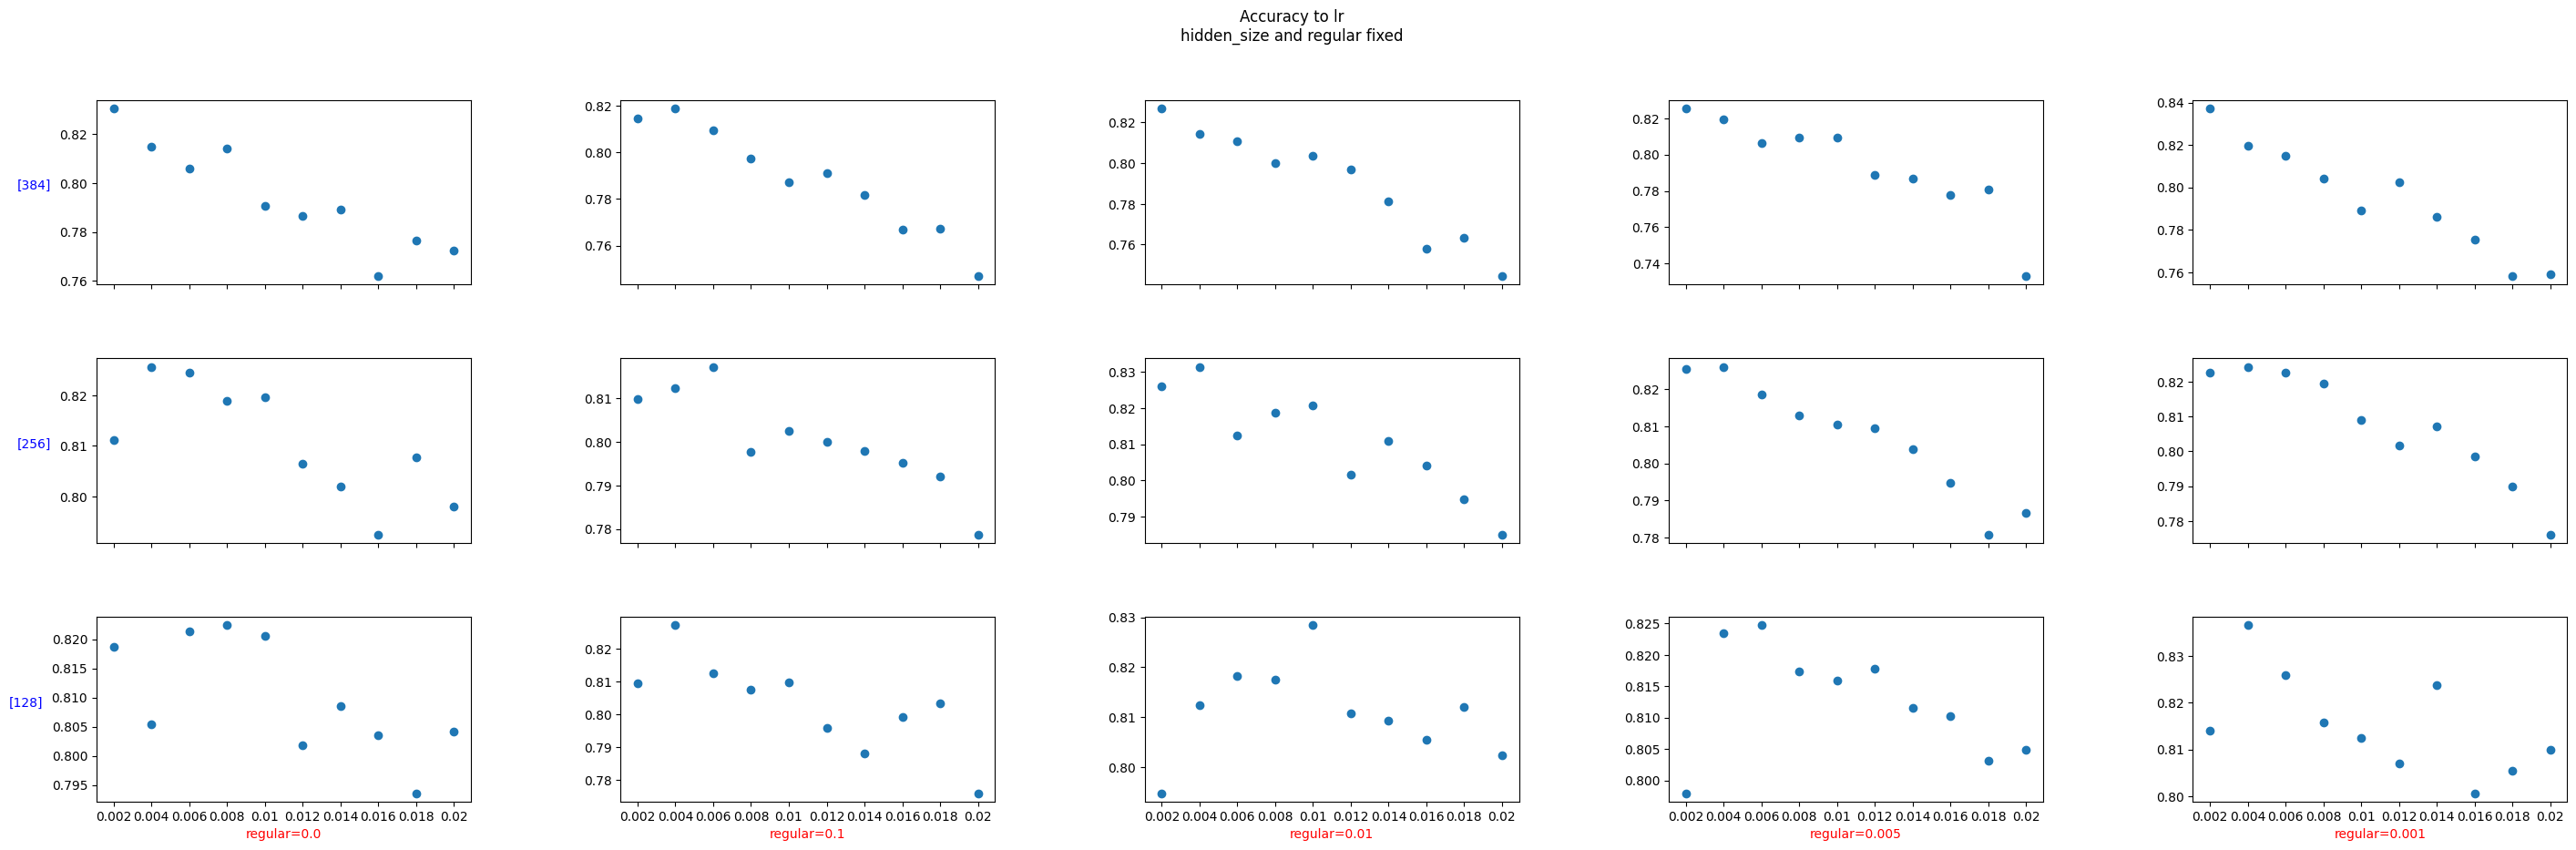

In [3]:
viz_search('search_result2.csv', [(35, 10), (35, 10)])

## 训练过程可视化

In [4]:
single_hidden = [
    './logs/search2/2024_0423(1713857657).json',
    './logs/search2/2024_0426(1714116650).json',
    './logs/search2/2024_0425(1713993322).json',
    './logs/search2/2024_0423(1713841292).json',
]
dual_hidden = [
    './logs/search1/2024_0423(1713807562).json',
    './logs/search1/2024_0423(1713808209).json',
    './logs/search1/2024_0423(1713806930).json',
    './logs/search1/2024_0423(1713816056).json',
]

### 四个单隐藏层模型

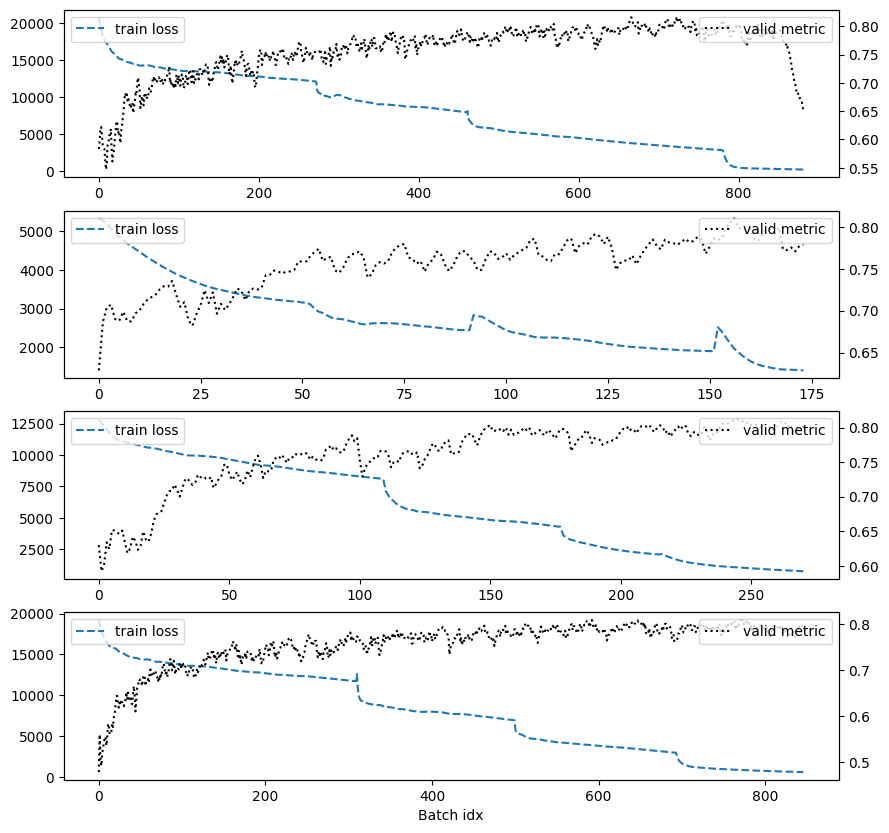

In [5]:
fig, axes = plt.subplots(figsize=(10,10),nrows=4, ncols=1)
for idx, file in enumerate(single_hidden):
    viz_trainlog(log_file=file, ax=axes[idx])
axes[-1].set_xlabel('Batch idx')
plt.show()

### 四个双隐藏层模型

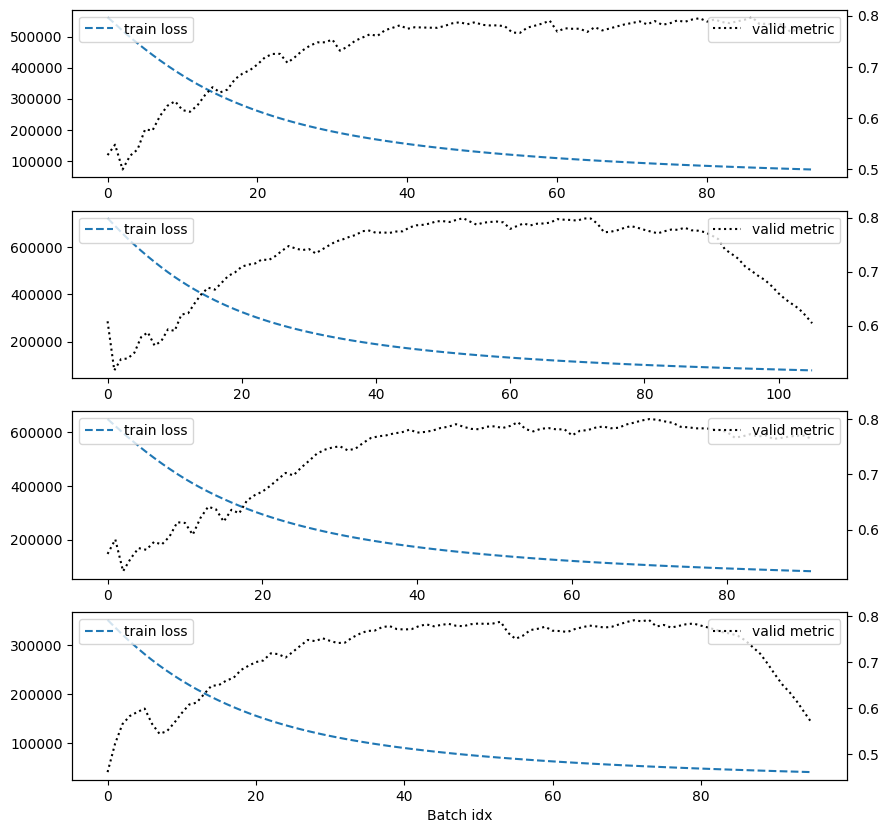

In [6]:
fig, axes = plt.subplots(figsize=(10,10),nrows=4, ncols=1)
for idx, file in enumerate(dual_hidden):
    viz_trainlog(log_file=file, ax=axes[idx])
axes[-1].set_xlabel('Batch idx')
plt.show()

## 网络参数可视化
我们使用`plt.imshow`可视化网络的参数，可以观察到**第一层的权重矩阵往往呈现条纹状**，后续的权重和偏置则未观察到明显的特征。

### 图例

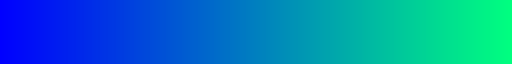

In [7]:
colormaps['winter']

### 双隐藏层

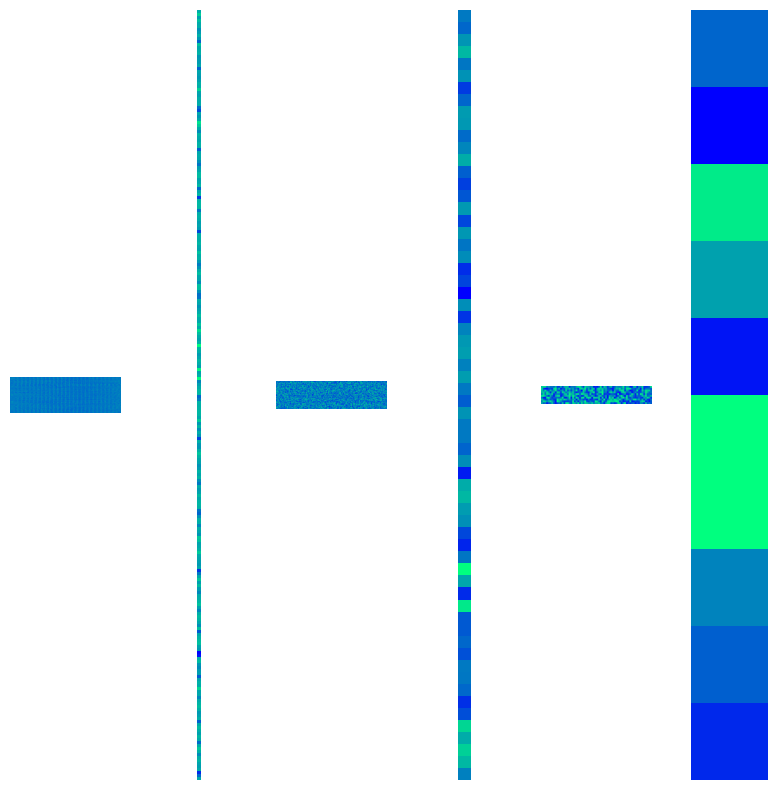

In [8]:
fig = viz_model('2024_0423(1713807562)')

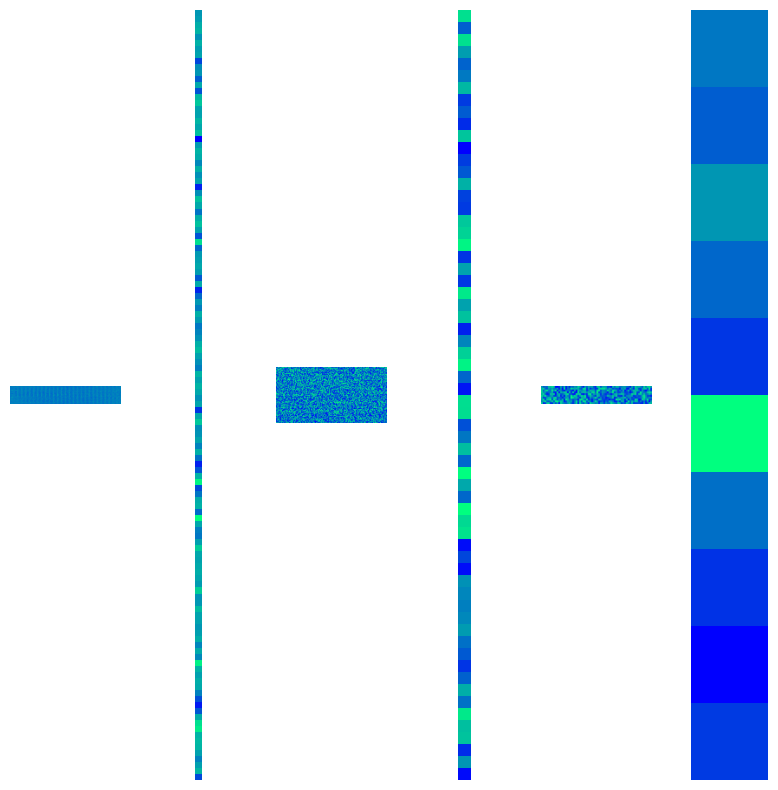

In [9]:
fig = viz_model('2024_0423(1713816056)')

### 单隐藏层

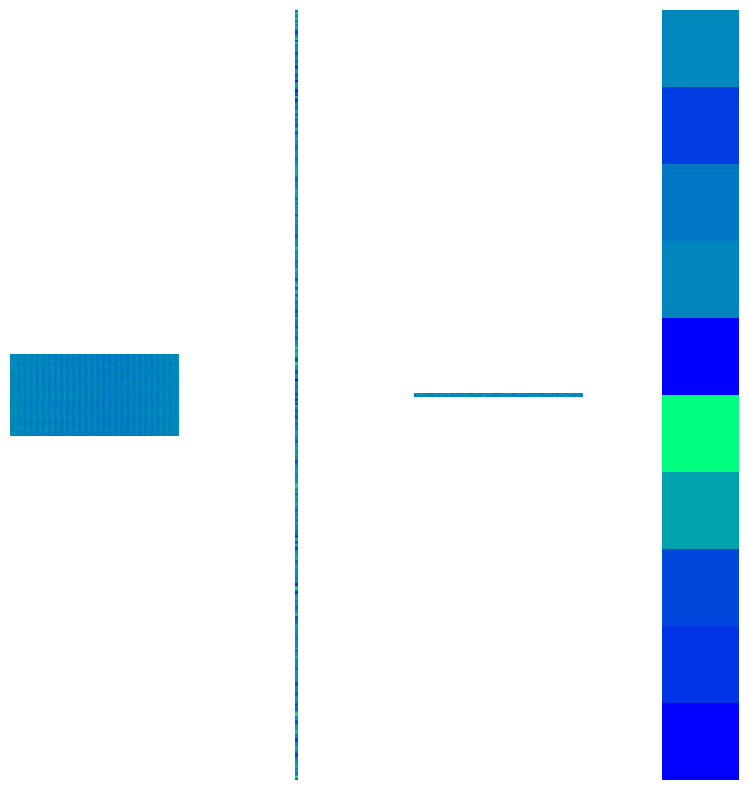

In [10]:
fig = viz_model('2024_0423(1713857657)')

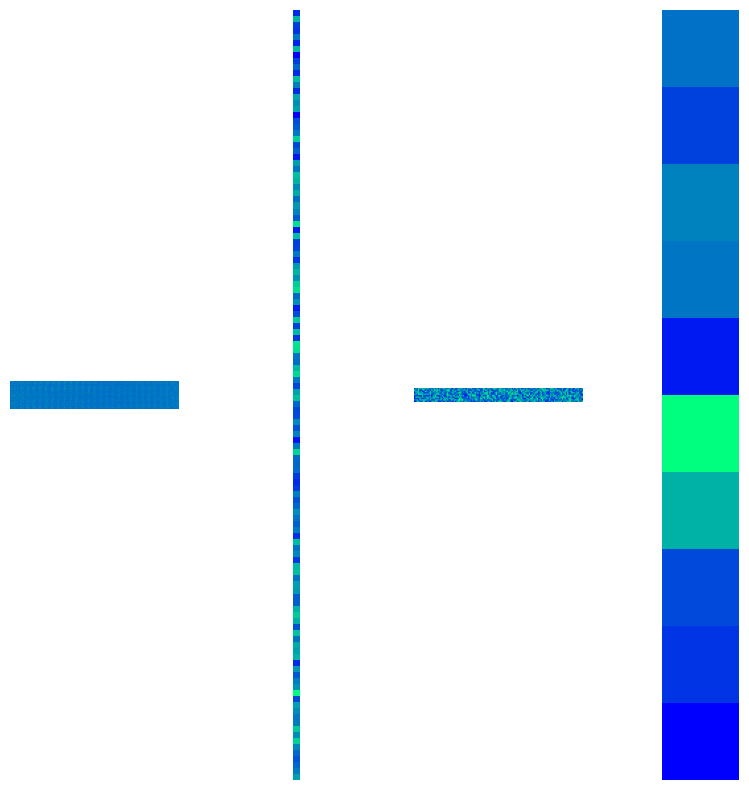

In [11]:
fig = viz_model('2024_0426(1714116650)')